<h1> PTRAIL:  A <b><i>P</i></b>arallel
<b><i>TR</i></b>ajectory
d<b><i>A</i></b>ta
preprocess<b><i>I</i></b>ng
<b><i>L</i></b>ibrary
</h1>

<h2> CPU Cores Comparisons </h2>

<p align='justify'>
This Jupyter Notebook compares the working of PTRAIL
with different number of cores. The purpose of showing such examples
is as follows:

<ol align='justify'>
    <li> It shows how the use of
         parallelization has helped in speeding up the execution
         of code.
    </li>
    <li> It also tries to find the ideal number or proportion of
         cores that will help in improving the execution time
         even more.
    </li>
    <li> Finally, it also demonstrates that as Number of unique
         trajectories in the dataframe increases, the speed up
         also increases if more number of CPU cores are available
         for processing the data.
    </li>
</ol>
</p>

<hr style="height:6px;background-color:black">

<!--------------- Dataset Section --------------------------->
<p align='justify'>
In this Jupyter Notebook containing comparisons, the following
dataset are used:
    <ul>
        <li> <a href="https://github.com/YakshHaranwala/PTRAIL/blob/main/examples/data/gulls.csv"> Seagulls Dataset </a> </li>
        <li> <a href="https://github.com/YakshHaranwala/PTRAIL/blob/main/examples/data/gulls.csv"> Seagulls Dataset </a> </li>
        <li> <a href="https://github.com/YakshHaranwala/PTRAIL/blob/main/examples/data/atlantic.csv"> Hurricane Dataset </a> </li>
    </ul>
</p>
<hr style="height:6px;background-color:black">
<!--------------- NB-Viewer Link ----------------------------->
<p align='justify'>
Note: Viewing this notebook in GitHub will not render JavaScript
elements. Hence, for a better experience, click the link below
to open the Jupyter notebook in NB viewer.

<span> &#8618; </span>
<a href="https://nbviewer.jupyter.org/github/YakshHaranwala/PTRAIL/blob/main/examples/6.%20PyMove_Comparisons.ipynb" target='_blank'> Click Here </a>
</p>
</html>

<p align='justify'>
    NOTE: It is to be noted that the Spatial functions used here
          are modified for the purposes of testing. The modifications
          include the number of CPU cores being variable. However,
          the actual library does not contain the changes yet and
          such feature implementation will be thought of in future
          after carful considerations and will be provided if it is
          deemed necessary and reasonable.
          <br><br>
    After extensive testing of all the various configurations
    of the number of CPU cores, the following conclusions
    can be draw from them:

<ul align='justify'>
    <li> The best execution times result when the number of cores
         being used is 2/3rds of the total number of cores
         available in the machine.
    </li>
    <li> As a result, all the features in the library are optimised
         to make the best use of the results from this experiment.
    </li>
</ul>
</p>

In [1]:
# First, lets import all the necessary modules in order
# read the datasets from the CSV file and represent them
# using the PTRAILDataFrame DataFrame.

from ptrail.core.TrajectoryDF import PTRAILDataFrame
import pandas as pd
from ptrail.utilities.conversions import Conversions as con
from time import time
from ptrail.features.spatial_features import SpatialFeatures as spatial

processors = [1, 2, 4, 8, 11]

In [2]:
# First, read all the csv files using pandas and store
# them in pandas dataframe. Then, converting them all to
# PTRAILDataFrame and then viewing the head of the PTRAILDataFrame
# DataFrame as well as the type of the DataFrame.

# 1. Geolife Dataset
pd_geolife = pd.read_csv('./data/geolife_sample.csv')
np_geolife = PTRAILDataFrame(data_set=pd_geolife,
                             latitude='lat',
                             longitude='lon',
                             datetime='datetime',
                             traj_id='id')
print(type(np_geolife))
np_geolife.head()

<class 'core.TrajectoryDF.NumPandasTraj'>


lat         lon
traj_id DateTime                                  
1       2008-10-23 05:53:11  39.984224  116.319402
        2008-10-23 05:53:16  39.984211  116.319389
        2008-10-23 05:53:21  39.984217  116.319422
        2008-10-23 05:53:23  39.984710  116.319865
        2008-10-23 05:53:28  39.984674  116.319810

In [3]:
# 2. Seagulls Dataset.
pd_gulls = pd.read_csv('./data/gulls.csv')
np_gulls = PTRAILDataFrame(data_set=pd_gulls,
                         latitude='location-lat',
                         longitude='location-long',
                         datetime='timestamp',
                         traj_id='tag-local-identifier',
                         rest_of_columns=[])
print(type(np_gulls))
np_gulls.head()

<class 'core.TrajectoryDF.NumPandasTraj'>


event-id  visible       lon       lat  \
traj_id DateTime                                                       
91732   2009-05-27 14:00:00  1082620685     True  24.58617  61.24783   
        2009-05-27 20:00:00  1082620686     True  24.58217  61.23267   
        2009-05-28 05:00:00  1082620687     True  24.53133  61.18833   
        2009-05-28 08:00:00  1082620688     True  24.58200  61.23283   
        2009-05-28 14:00:00  1082620689     True  24.58250  61.23267   

                            sensor-type individual-taxon-canonical-name  \
traj_id DateTime                                                          
91732   2009-05-27 14:00:00         gps                    Larus fuscus   
        2009-05-27 20:00:00         gps                    Larus fuscus   
        2009-05-28 05:00:00         gps                    Larus fuscus   
        2009-05-28 08:00:00         gps                    Larus fuscus   
        2009-05-28 14:00:00         gps                    Larus fuscus   

                            individual-local-identifier  \
traj_id DateTime                                          
91732   2009-05-27 14:00:00                      91732A   
        2009-05-27 20:00:00                      91732A   
        2009-05-28 05:00:00                      91732A   
        2009-05-28 08:00:00                      91732A   
        2009-05-28 14:00:00                      91732A   

                                                                    study-name  
traj_id DateTime                                                                
91732   2009-05-27 14:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-27 20:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 05:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 08:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 14:00:00  Navigation experiments in lesser black-backed ...

In [4]:
# 3. Atlantic Hurricanes. It is to be noted that apart from reading
# the csv file, some columns of the Hurricane Dataset are also
# to be manipulated in order to be stored as PTRAILDataFrame.
pd_atlantic = pd.read_csv('./data/atlantic.csv')
pd_atlantic = con.convert_directions_to_degree_lat_lon(pd_atlantic, 'Latitude',"Longitude")
def convert_to_datetime(row):
        this_date = '{}-{}-{}'.format(str(row['Date'])[0:4], str(row['Date'])[4:6], str(row['Date'])[6:])
        this_time = '{:02d}:{:02d}:00'.format(int(row['Time']/100), int(str(row['Time'])[-2:]))
        return '{} {}'.format(this_date, this_time)
pd_atlantic['DateTime'] = pd_atlantic.apply(convert_to_datetime, axis=1)

np_atlantic = PTRAILDataFrame(pd_atlantic,
                            latitude='Latitude',
                            longitude='Longitude',
                            datetime='DateTime',
                            traj_id='ID',
                            rest_of_columns=[])
print(type(np_atlantic))
np_atlantic.head()

<class 'core.TrajectoryDF.NumPandasTraj'>


Name      Date  Time Event  \
traj_id  DateTime                                                         
AL011851 1851-06-25 00:00:00              UNNAMED  18510625     0         
         1851-06-25 06:00:00              UNNAMED  18510625   600         
         1851-06-25 12:00:00              UNNAMED  18510625  1200         
         1851-06-25 18:00:00              UNNAMED  18510625  1800         
         1851-06-25 21:00:00              UNNAMED  18510625  2100     L   

                             Status   lat   lon  Maximum Wind  \
traj_id  DateTime                                               
AL011851 1851-06-25 00:00:00     HU  28.0 -94.8            80   
         1851-06-25 06:00:00     HU  28.0 -95.4            80   
         1851-06-25 12:00:00     HU  28.0 -96.0            80   
         1851-06-25 18:00:00     HU  28.1 -96.5            80   
         1851-06-25 21:00:00     HU  28.2 -96.8            80   

                              Minimum Pressure  Low Wind NE  ...  Low Wind SW  \
traj_id  DateTime                                            ...                
AL011851 1851-06-25 00:00:00              -999         -999  ...         -999   
         1851-06-25 06:00:00              -999         -999  ...         -999   
         1851-06-25 12:00:00              -999         -999  ...         -999   
         1851-06-25 18:00:00              -999         -999  ...         -999   
         1851-06-25 21:00:00              -999         -999  ...         -999   

                              Low Wind NW  Moderate Wind NE  Moderate Wind SE  \
traj_id  DateTime                                                               
AL011851 1851-06-25 00:00:00         -999              -999              -999   
         1851-06-25 06:00:00         -999              -999              -999   
         1851-06-25 12:00:00         -999              -999              -999   
         1851-06-25 18:00:00         -999              -999              -999   
         1851-06-25 21:00:00         -999              -999              -999   

                              Moderate Wind SW  Moderate Wind NW  \
traj_id  DateTime                                                  
AL011851 1851-06-25 00:00:00              -999              -999   
         1851-06-25 06:00:00              -999              -999   
         1851-06-25 12:00:00              -999              -999   
         1851-06-25 18:00:00              -999              -999   
         1851-06-25 21:00:00              -999              -999   

                              High Wind NE  High Wind SE  High Wind SW  \
traj_id  DateTime                                                        
AL011851 1851-06-25 00:00:00          -999          -999          -999   
         1851-06-25 06:00:00          -999          -999          -999   
         1851-06-25 12:00:00          -999          -999          -999   
         1851-06-25 18:00:00          -999          -999          -999   
         1851-06-25 21:00:00          -999          -999          -999   

                              High Wind NW  
traj_id  DateTime                           
AL011851 1851-06-25 00:00:00          -999  
         1851-06-25 06:00:00          -999  
         1851-06-25 12:00:00          -999  
         1851-06-25 18:00:00          -999  
         1851-06-25 21:00:00          -999  

[5 rows x 21 columns]

In [5]:
"""
    First of all, here seagulls dataset is used to perform
    the following experimental steps:
        1. Calculation of 3 spatial functions with
           variable number of CPU cores.
        2. Plotting the Execution time vs Number of CPU cores
           used to demonstrate the speedup gain as the number
           of CPUs increase.
"""

spatial_gulls_times = []

# Calculate the following features 20 times using 1 processor:
#   1. Distance_prev_to_curr.
#   2. Distance_start_to_curr.
#   3. Bearing_between_consecutive.
t1 = time()
for i in range(20):
    spatial_gulls = spatial.create_distance_between_consecutive_column(np_gulls, cpu_count=1)
    spatial_gulls = spatial.create_distance_from_start_column(spatial_gulls, cpu_count=1)
    spatial_gulls = spatial.create_bearing_column(spatial_gulls, cpu_count=1)
t2 = time()
spatial_gulls_times.append(t2 - t1)

In [6]:
# Using 2 Processors.
t1 = time()
for i in range(20):
    spatial_gulls = spatial.create_distance_between_consecutive_column(np_gulls, cpu_count=2)
    spatial_gulls = spatial.create_distance_from_start_column(spatial_gulls, cpu_count= 2)
    spatial_gulls = spatial.create_bearing_column(spatial_gulls, cpu_count=2)
t2 = time()
spatial_gulls_times.append(t2 - t1)

In [7]:
# Using 4 processors:
t1 = time()
for i in range(20):
    spatial_gulls = spatial.create_distance_between_consecutive_column(np_gulls, cpu_count=4)
    spatial_gulls = spatial.create_distance_from_start_column(spatial_gulls, cpu_count= 4)
    spatial_gulls = spatial.create_bearing_column(spatial_gulls, cpu_count=4)
t2 = time()
spatial_gulls_times.append(t2 - t1)

In [8]:
# Using 8 processors:
t1 = time()
for i in range(20):
    spatial_gulls = spatial.create_distance_between_consecutive_column(np_gulls, cpu_count=8)
    spatial_gulls = spatial.create_distance_from_start_column(spatial_gulls, cpu_count= 8)
    spatial_gulls = spatial.create_bearing_column(spatial_gulls, cpu_count=8)
t2 = time()
spatial_gulls_times.append(t2 - t1)

In [9]:
# Using 12 processors:
t1 = time()
for i in range(20):
    spatial_gulls = spatial.create_distance_between_consecutive_column(np_gulls, cpu_count=12)
    spatial_gulls = spatial.create_distance_from_start_column(spatial_gulls, cpu_count= 12)
    spatial_gulls = spatial.create_bearing_column(spatial_gulls, cpu_count=12)
t2 = time()
spatial_gulls_times.append(t2 - t1)

[37.65512037277222, 22.799370765686035, 23.336839199066162, 19.78929352760315, 27.508859395980835]


Text(0, 0.5, 'Execution Time (s)')

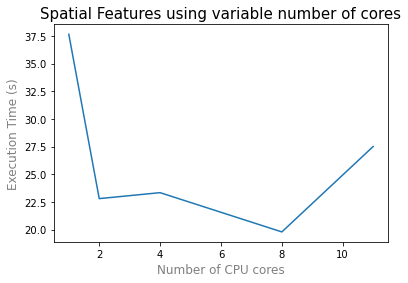

In [10]:
import matplotlib.pyplot as plt
print(spatial_gulls_times)
plt.plot(processors,
         spatial_gulls_times)
plt.title('Spatial Features using variable number of cores',
          color='black', size=15)
plt.xlabel('Number of CPU cores', color='grey', size=12)
plt.ylabel('Execution Time (s)', color='grey', size=12)


In [11]:
spatial_atlantic_times = []

# Calculate the following features 20 times using 1 processor for
# atlantic Dataset:
#   1. Distance_prev_to_curr.
#   2. Distance_start_to_curr.
#   3. Bearing_between_consecutive.
t1 = time()
for i in range(20):
    spatial_atlantic = spatial.create_distance_between_consecutive_column(np_atlantic, cpu_count=1)
    spatial_atlantic = spatial.create_distance_from_start_column(spatial_atlantic, cpu_count=1)
    spatial_atlantic = spatial.create_bearing_column(spatial_atlantic, cpu_count=1)
t2 = time()
spatial_atlantic_times.append(t2 - t1)

In [12]:
# Using 2 processors:
t1 = time()
for i in range(20):
    spatial_atlantic = spatial.create_distance_between_consecutive_column(np_atlantic, cpu_count=2)
    spatial_atlantic = spatial.create_distance_from_start_column(spatial_atlantic, cpu_count= 2)
    spatial_atlantic = spatial.create_bearing_column(spatial_atlantic, cpu_count=2)
t2 = time()
spatial_atlantic_times.append(t2 - t1)

In [13]:
# Using 4 processors:
t1 = time()
for i in range(20):
    spatial_atlantic = spatial.create_distance_between_consecutive_column(np_atlantic, cpu_count=4)
    spatial_gulls = spatial.create_distance_from_start_column(spatial_atlantic, cpu_count= 4)
    spatial_atlantic = spatial.create_bearing_column(spatial_atlantic, cpu_count=4)
t2 = time()
spatial_atlantic_times.append(t2 - t1)

In [14]:
# Using 8 processors:
t1 = time()
for i in range(20):
    spatial_atlantic = spatial.create_distance_between_consecutive_column(np_atlantic, cpu_count=8)
    spatial_gulls = spatial.create_distance_from_start_column(spatial_atlantic, cpu_count= 8)
    spatial_atlantic = spatial.create_bearing_column(spatial_atlantic, cpu_count=8)
t2 = time()
spatial_atlantic_times.append(t2 - t1)

In [15]:
# Using 12 processors:
t1 = time()
for i in range(20):
    spatial_atlantic = spatial.create_distance_between_consecutive_column(np_atlantic, cpu_count=12)
    spatial_atlantic = spatial.create_distance_from_start_column(spatial_atlantic, cpu_count= 12)
    spatial_atlantic = spatial.create_bearing_column(spatial_atlantic, cpu_count=12)
t2 = time()
spatial_atlantic_times.append(t2 - t1)

[162.94160223007202, 85.02516770362854, 70.74139785766602, 53.978840827941895, 55.43101668357849]


Text(0, 0.5, 'Execution Time (s)')

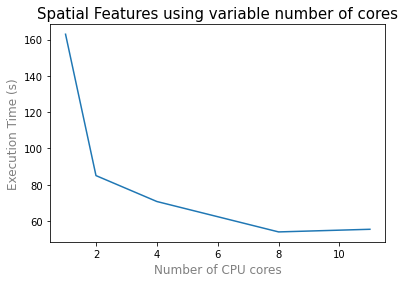

In [16]:
import matplotlib.pyplot as plt
print(spatial_atlantic_times)
plt.plot(processors,
         spatial_atlantic_times)
plt.title('Spatial Features using variable number of cores',
          color='black', size=15)
plt.xlabel('Number of CPU cores', color='grey', size=12)
plt.ylabel('Execution Time (s)', color='grey', size=12)

